In [158]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import f1_score, make_scorer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from collections import Counter
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
train_data = pd.read_csv("train.csv", usecols=["class", "viewCount", "commentCount", "likeCount", "dislikeCount", "title", 
                                               "description", "user_comment_1", "user_comment_2", "user_comment_3", "user_comment_4",
                                               "user_comment_5", "user_comment_6", "user_comment_7", "user_comment_8",
                                               "user_comment_9", "user_comment_10"]) 
test_data = pd.read_csv("test_1.csv", usecols=["ID","viewCount", "commentCount", "likeCount", "dislikeCount", "title", "description", 
                                               "user_comment_1", "user_comment_2", "user_comment_3", "user_comment_4",
                                               "user_comment_5", "user_comment_6", "user_comment_7", "user_comment_8",
                                               "user_comment_9", "user_comment_10"])

In [160]:
train_data.head()

,title,description,viewCount,likeCount,dislikeCount,commentCount,user_comment_1,user_comment_2,user_comment_3,user_comment_4,user_comment_5,user_comment_6,user_comment_7,user_comment_8,user_comment_9,user_comment_10,class
0,MARZIA HAS LIGMA LWIAY #0044,Become Sponsor: https://youtube.com/pewdiepie/...,10509398.0,945921.0,5614.0,58844,Other man: *touches Marzia's hand*\nPewds: som...,**marzia is in a video**\n\n**pewds quality in...,8:51 Proof that Italians do the hand thing whe...,"Me: Mom can we have LWIAY intro?\nMom: No, we ...",Nobody:\nYoutube: Let's recommend this video 9...,Felix you did not disappoint with that outro,belle delphine: eats pewdiepie\n\n\nMarzia: SO...,The Italian words pewds said roughly translate...,Marzia- how about watching old videos \n\nMe i...,outro: *Fire*\nscreen: *black*\nFelix: is that...,True
1,This Slinky Montage Is Bizarrely Satisfying to...,Happy National Slinky Day! We got our hands on...,4829.0,57.0,81.0,22,neither bizarre nor satisfying. barely watchab...,You could have just played the scene from Ace ...,When the new toy in the office becomes everybo...,"Almost so satisfying, slinky occasionally land...",There is something strangely satisfying in wat...,"Now that I think of it, slinkys are insanely w...",S L I N K Y P O R N,That stairwell is definitely coated in urine.,wtf has happened to your content,They're like unknown creatures moving down the...,False
2,MAKING HER DREAM COME TRUE! (MAKE A WISH),It was so nice to meet you Trinity 😊\nGET NEW ...,1015456.0,36679.0,492.0,3739,Follow me on Instagram @Lance210,Another proof you have a big heart ❤,She still has not used any of that money she i...,Im 12 my name is cyrus and i have severe asthm...,Lance is such a happy and productive person an...,I’ve had something called ugliness since I was...,I loved this u really made them girls day❤,The awkwardness was real😂😂😂!!!!!!,"Awkward, but really cool u could do that for t...",GOD BLESS you Lance,True
3,Science Journalism: Crash Course Statistics #11,We’ve talked a lot in this series about how of...,64629.0,2111.0,24.0,151,"It's not as simple as ""checking the source"". M...","This should go into media literacy, I think, i...",This episode should be correlated with CrashCo...,There's Media Literacy in my Statistics! Nice ...,Ah! She is just lovely! Excellent episode.,Loved the limerick.,"Article: ""a study found a mild correlation bet...",Videos like this should absolutely be regular ...,Love the poetry :-)\nIt's important to know wh...,"Bonus points for ""Partial Foods.""",False
4,"Michelin and General Motors Unveil Airless, Pu...",Michelin and General Motors are betting on nea...,206468.0,1335.0,96.0,470,Perfect can get spike stripped and still outru...,The tires have been in development for so long...,"How will they do on side loads, like high spee...","Michelin chill out, I work in roadside assista...",They look good but I hope it's enough to hold ...,"When you fail to present the downsides, you ju...",I am definitely going to pick up a set of thes...,Yeah but the real questions are; how much road...,They give in a lot. At least it looks like it....,We've seen various versions of this concept fo...,False


In [161]:
emoji_list = ["😂","🔥","💀","👇","🆗","❤️","🐱","😀","🙄","🐶","😝","🙈","😉","😲","❗","💪","🌈","💕","👏","👍🏻","🤦‍♂️",
            "🧠","🧑","👕","👞","😇","🌹","🙂","😍","😘","😠","💘","😑","🙁","🙌🏼","✝️","🧣","🙏🏽","👸🏽","🎟","💙","😢",
             "🤔","😱","😆","😔","😒","█","✌🏻","🙃","😕","😩","🍲","👭","👟","😎","👊","🍪","🚗","🐬","🎄","💜","💖"]

In [162]:
comment1 = train_data["user_comment_1"]
comment2 = train_data["user_comment_2"]
comment3 = train_data["user_comment_3"]
comment4 = train_data["user_comment_4"]
comment5 = train_data["user_comment_5"]
comment6 = train_data["user_comment_6"]
comment7 = train_data["user_comment_7"]
comment8 = train_data["user_comment_8"]
comment9 = train_data["user_comment_9"]
comment0 = train_data["user_comment_10"]

num_emojis1 = []
num_emojis2 = []
num_emojis3 = []
num_emojis4 = []
num_emojis5 = []
num_emojis6 = []
num_emojis7 = []
num_emojis8 = []
num_emojis9 = []
num_emojis0 = []

for i1 in comment1:
    emojis1 = sum(1 for c1 in i1 if c1 in emoji_list)
    num_emojis1.append(emojis1)
    
for i2 in comment2:
    emojis2 = sum(1 for c2 in i2 if c2 in emoji_list)
    num_emojis2.append(emojis2)
    
for i3 in comment3:
    emojis3 = sum(1 for c3 in i3 if c3 in emoji_list)
    num_emojis3.append(emojis3)

for i4 in comment4:
    emojis4 = sum(1 for c4 in i4 if c4 in emoji_list)
    num_emojis4.append(emojis4)
    
for i5 in comment5:
    emojis5 = sum(1 for c5 in i5 if c5 in emoji_list)
    num_emojis5.append(emojis5)
    
for i6 in comment6:
    emojis6 = sum(1 for c6 in i6 if c6 in emoji_list)
    num_emojis6.append(emojis6)
    
for i7 in comment7:
    emojis7 = sum(1 for c7 in i7 if c7 in emoji_list)
    num_emojis7.append(emojis7)
    
for i8 in comment8:
    emojis8 = sum(1 for c8 in i8 if c8 in emoji_list)
    num_emojis8.append(emojis8)
    
for i9 in comment9:
    emojis9 = sum(1 for c9 in i9 if c9 in emoji_list)
    num_emojis9.append(emojis9)
    
for i0 in comment0:
    emojis0 = sum(1 for c0 in i0 if c0 in emoji_list)
    num_emojis0.append(emojis0)
    
train_data["emojis_1"] = num_emojis1
train_data["emojis_2"] = num_emojis2
train_data["emojis_3"] = num_emojis3
train_data["emojis_4"] = num_emojis4
train_data["emojis_5"] = num_emojis5
train_data["emojis_6"] = num_emojis6
train_data["emojis_7"] = num_emojis7
train_data["emojis_8"] = num_emojis8
train_data["emojis_9"] = num_emojis9
train_data["emojis_0"] = num_emojis0

train_data["emojis_comments"] = train_data["emojis_1"] + train_data["emojis_2"] + train_data["emojis_3"] + train_data["emojis_4"] + train_data["emojis_5"] + train_data["emojis_6"] + train_data["emojis_7"] + train_data["emojis_8"] + train_data["emojis_9"] + train_data["emojis_0"]
train_data = train_data.drop(["emojis_1","emojis_2","emojis_3","emojis_4","emojis_5","emojis_6","emojis_7","emojis_8","emojis_9","emojis_0"], axis=1)

In [163]:
comment1 = test_data["user_comment_1"]
comment2 = test_data["user_comment_2"]
comment3 = test_data["user_comment_3"]
comment4 = test_data["user_comment_4"]
comment5 = test_data["user_comment_5"]
comment6 = test_data["user_comment_6"]
comment7 = test_data["user_comment_7"]
comment8 = test_data["user_comment_8"]
comment9 = test_data["user_comment_9"]
comment0 = test_data["user_comment_10"]

num_emojis1 = []
num_emojis2 = []
num_emojis3 = []
num_emojis4 = []
num_emojis5 = []
num_emojis6 = []
num_emojis7 = []
num_emojis8 = []
num_emojis9 = []
num_emojis0 = []

for i1 in comment1:
    emojis1 = sum(1 for c1 in i1 if c1 in emoji_list)
    num_emojis1.append(emojis1)
    
for i2 in comment2:
    emojis2 = sum(1 for c2 in i2 if c2 in emoji_list)
    num_emojis2.append(emojis2)
    
for i3 in comment3:
    emojis3 = sum(1 for c3 in i3 if c3 in emoji_list)
    num_emojis3.append(emojis3)

for i4 in comment4:
    emojis4 = sum(1 for c4 in i4 if c4 in emoji_list)
    num_emojis4.append(emojis4)
    
for i5 in comment5:
    emojis5 = sum(1 for c5 in i5 if c5 in emoji_list)
    num_emojis5.append(emojis5)
    
for i6 in comment6:
    emojis6 = sum(1 for c6 in i6 if c6 in emoji_list)
    num_emojis6.append(emojis6)
    
for i7 in comment7:
    emojis7 = sum(1 for c7 in i7 if c7 in emoji_list)
    num_emojis7.append(emojis7)
    
for i8 in comment8:
    emojis8 = sum(1 for c8 in i8 if c8 in emoji_list)
    num_emojis8.append(emojis8)
    
for i9 in comment9:
    emojis9 = sum(1 for c9 in i9 if c9 in emoji_list)
    num_emojis9.append(emojis9)
    
for i0 in comment0:
    emojis0 = sum(1 for c0 in i0 if c0 in emoji_list)
    num_emojis0.append(emojis0)
    
test_data["emojis_1"] = num_emojis1
test_data["emojis_2"] = num_emojis2
test_data["emojis_3"] = num_emojis3
test_data["emojis_4"] = num_emojis4
test_data["emojis_5"] = num_emojis5
test_data["emojis_6"] = num_emojis6
test_data["emojis_7"] = num_emojis7
test_data["emojis_8"] = num_emojis8
test_data["emojis_9"] = num_emojis9
test_data["emojis_0"] = num_emojis0

test_data["emojis_comments"] = test_data["emojis_1"] + test_data["emojis_2"] + test_data["emojis_3"] + test_data["emojis_4"] + test_data["emojis_5"] + test_data["emojis_6"] + test_data["emojis_7"] + test_data["emojis_8"] + test_data["emojis_9"] + test_data["emojis_0"]
test_data = test_data.drop(["emojis_1","emojis_2","emojis_3","emojis_4","emojis_5","emojis_6","emojis_7","emojis_8","emojis_9","emojis_0"], axis=1)

In [164]:
comment1 = train_data["user_comment_1"]
comment2 = train_data["user_comment_2"]
comment3 = train_data["user_comment_3"]
comment4 = train_data["user_comment_4"]
comment5 = train_data["user_comment_5"]
comment6 = train_data["user_comment_6"]
comment7 = train_data["user_comment_7"]
comment8 = train_data["user_comment_8"]
comment9 = train_data["user_comment_9"]
comment0 = train_data["user_comment_10"]

num_upper1 = []
num_upper2 = []
num_upper3 = []
num_upper4 = []
num_upper5 = []
num_upper6 = []
num_upper7 = []
num_upper8 = []
num_upper9 = []
num_upper0 = []

num_lower1 = []
num_lower2 = []
num_lower3 = []
num_lower4 = []
num_lower5 = []
num_lower6 = []
num_lower7 = []
num_lower8 = []
num_lower9 = []
num_lower0 = []

for i1 in comment1:
    upper1 = sum(1 for c1 in i1 if c1.isupper())
    num_upper1.append(upper1)
    lower1 = sum(1 for c1 in i1 if c1.islower())
    num_lower1.append(lower1)
    
for i2 in comment2:
    upper2 = sum(1 for c2 in i2 if c2.islower())
    num_upper2.append(upper2)
    lower2 = sum(1 for c2 in i2 if c2.islower())
    num_lower2.append(lower2)
    
for i3 in comment3:
    upper3 = sum(1 for c3 in i3 if c3.isupper())
    num_upper3.append(upper3)
    lower3 = sum(1 for c3 in i3 if c3.islower())
    num_lower3.append(lower3)

for i4 in comment4:
    upper4 = sum(1 for c4 in i4 if c4.isupper())
    num_upper4.append(upper4)
    lower4 = sum(1 for c4 in i4 if c4.islower())
    num_lower4.append(lower4)
    
for i5 in comment5:
    upper5 = sum(1 for c5 in i5 if c5.isupper())
    num_upper5.append(upper5)
    lower5 = sum(1 for c5 in i5 if c5.islower())
    num_lower5.append(lower5)
    
for i6 in comment6:
    upper6 = sum(1 for c6 in i6 if c6.isupper())
    num_upper6.append(upper6)
    lower6 = sum(1 for c6 in i6 if c6.islower())
    num_lower6.append(lower6)
    
for i7 in comment7:
    upper7 = sum(1 for c7 in i7 if c7.isupper())
    num_upper7.append(upper7)
    lower7 = sum(1 for c7 in i7 if c7.islower())
    num_lower7.append(lower7)
    
for i8 in comment8:
    upper8 = sum(1 for c8 in i8 if c8.isupper())
    num_upper8.append(upper8)
    lower8 = sum(1 for c8 in i8 if c8.islower())
    num_lower8.append(lower8)
    
for i9 in comment9:
    upper9 = sum(1 for c9 in i9 if c9.isupper())
    num_upper9.append(upper9)
    lower9 = sum(1 for c9 in i9 if c9.islower())
    num_lower9.append(lower9)
    
for i0 in comment0:
    upper0 = sum(1 for c0 in i0 if c0.isupper())
    num_upper0.append(upper0)
    lower0 = sum(1 for c0 in i0 if c0.islower())
    num_lower0.append(lower0)
    
train_data["upper_1"] = num_upper1
train_data["upper_2"] = num_upper2
train_data["upper_3"] = num_upper3
train_data["upper_4"] = num_upper4
train_data["upper_5"] = num_upper5
train_data["upper_6"] = num_upper6
train_data["upper_7"] = num_upper7
train_data["upper_8"] = num_upper8
train_data["upper_9"] = num_upper9
train_data["upper_0"] = num_upper0

train_data["lower_1"] = num_lower1
train_data["lower_2"] = num_lower2
train_data["lower_3"] = num_lower3
train_data["lower_4"] = num_lower4
train_data["lower_5"] = num_lower5
train_data["lower_6"] = num_lower6
train_data["lower_7"] = num_lower7
train_data["lower_8"] = num_lower8
train_data["lower_9"] = num_lower9
train_data["lower_0"] = num_lower0

train_data["upper_comments"] = train_data["upper_1"] + train_data["upper_2"] + train_data["upper_3"] + train_data["upper_4"] + train_data["upper_5"] + train_data["upper_6"] + train_data["upper_7"] + train_data["upper_8"] + train_data["upper_9"] + train_data["upper_0"]
train_data = train_data.drop(["upper_1","upper_2","upper_3","upper_4","upper_5","upper_6","upper_7","upper_8","upper_9","upper_0"], axis=1)

train_data["lower_comments"] = train_data["lower_1"] + train_data["lower_2"] + train_data["lower_3"] + train_data["lower_4"] + train_data["lower_5"] + train_data["lower_6"] + train_data["lower_7"] + train_data["lower_8"] + train_data["lower_9"] + train_data["lower_0"]
train_data = train_data.drop(["lower_1","lower_2","lower_3","lower_4","lower_5","lower_6","lower_7","lower_8","lower_9","lower_0"], axis=1)

train_data["percent_upper_comments"] = train_data["upper_comments"] / (train_data["upper_comments"] + train_data["lower_comments"])
train_data["percent_upper_comments"] = train_data["percent_upper_comments"].fillna(0)

train_data = train_data.drop(["user_comment_1","user_comment_2","user_comment_3","user_comment_4","user_comment_5","user_comment_6","user_comment_7","user_comment_8","user_comment_9","user_comment_10"], axis=1)

In [165]:
comment1 = test_data["user_comment_1"]
comment2 = test_data["user_comment_2"]
comment3 = test_data["user_comment_3"]
comment4 = test_data["user_comment_4"]
comment5 = test_data["user_comment_5"]
comment6 = test_data["user_comment_6"]
comment7 = test_data["user_comment_7"]
comment8 = test_data["user_comment_8"]
comment9 = test_data["user_comment_9"]
comment0 = test_data["user_comment_10"]

num_upper1 = []
num_upper2 = []
num_upper3 = []
num_upper4 = []
num_upper5 = []
num_upper6 = []
num_upper7 = []
num_upper8 = []
num_upper9 = []
num_upper0 = []

num_lower1 = []
num_lower2 = []
num_lower3 = []
num_lower4 = []
num_lower5 = []
num_lower6 = []
num_lower7 = []
num_lower8 = []
num_lower9 = []
num_lower0 = []

for i1 in comment1:
    upper1 = sum(1 for c1 in i1 if c1.isupper())
    num_upper1.append(upper1)
    lower1 = sum(1 for c1 in i1 if c1.islower())
    num_lower1.append(lower1)
    
for i2 in comment2:
    upper2 = sum(1 for c2 in i2 if c2.islower())
    num_upper2.append(upper2)
    lower2 = sum(1 for c2 in i2 if c2.islower())
    num_lower2.append(lower2)
    
for i3 in comment3:
    upper3 = sum(1 for c3 in i3 if c3.isupper())
    num_upper3.append(upper3)
    lower3 = sum(1 for c3 in i3 if c3.islower())
    num_lower3.append(lower3)

for i4 in comment4:
    upper4 = sum(1 for c4 in i4 if c4.isupper())
    num_upper4.append(upper4)
    lower4 = sum(1 for c4 in i4 if c4.islower())
    num_lower4.append(lower4)
    
for i5 in comment5:
    upper5 = sum(1 for c5 in i5 if c5.isupper())
    num_upper5.append(upper5)
    lower5 = sum(1 for c5 in i5 if c5.islower())
    num_lower5.append(lower5)
    
for i6 in comment6:
    upper6 = sum(1 for c6 in i6 if c6.isupper())
    num_upper6.append(upper6)
    lower6 = sum(1 for c6 in i6 if c6.islower())
    num_lower6.append(lower6)
    
for i7 in comment7:
    upper7 = sum(1 for c7 in i7 if c7.isupper())
    num_upper7.append(upper7)
    lower7 = sum(1 for c7 in i7 if c7.islower())
    num_lower7.append(lower7)
    
for i8 in comment8:
    upper8 = sum(1 for c8 in i8 if c8.isupper())
    num_upper8.append(upper8)
    lower8 = sum(1 for c8 in i8 if c8.islower())
    num_lower8.append(lower8)
    
for i9 in comment9:
    upper9 = sum(1 for c9 in i9 if c9.isupper())
    num_upper9.append(upper9)
    lower9 = sum(1 for c9 in i9 if c9.islower())
    num_lower9.append(lower9)
    
for i0 in comment0:
    upper0 = sum(1 for c0 in i0 if c0.isupper())
    num_upper0.append(upper0)
    lower0 = sum(1 for c0 in i0 if c0.islower())
    num_lower0.append(lower0)
    
test_data["upper_1"] = num_upper1
test_data["upper_2"] = num_upper2
test_data["upper_3"] = num_upper3
test_data["upper_4"] = num_upper4
test_data["upper_5"] = num_upper5
test_data["upper_6"] = num_upper6
test_data["upper_7"] = num_upper7
test_data["upper_8"] = num_upper8
test_data["upper_9"] = num_upper9
test_data["upper_0"] = num_upper0

test_data["lower_1"] = num_lower1
test_data["lower_2"] = num_lower2
test_data["lower_3"] = num_lower3
test_data["lower_4"] = num_lower4
test_data["lower_5"] = num_lower5
test_data["lower_6"] = num_lower6
test_data["lower_7"] = num_lower7
test_data["lower_8"] = num_lower8
test_data["lower_9"] = num_lower9
test_data["lower_0"] = num_lower0

test_data["upper_comments"] = test_data["upper_1"] + test_data["upper_2"] + test_data["upper_3"] + test_data["upper_4"] + test_data["upper_5"] + test_data["upper_6"] + test_data["upper_7"] + test_data["upper_8"] + test_data["upper_9"] + test_data["upper_0"]
test_data = test_data.drop(["upper_1","upper_2","upper_3","upper_4","upper_5","upper_6","upper_7","upper_8","upper_9","upper_0"], axis=1)

test_data["lower_comments"] = test_data["lower_1"] + test_data["lower_2"] + test_data["lower_3"] + test_data["lower_4"] + test_data["lower_5"] + test_data["lower_6"] + test_data["lower_7"] + test_data["lower_8"] + test_data["lower_9"] + test_data["lower_0"]
test_data = test_data.drop(["lower_1","lower_2","lower_3","lower_4","lower_5","lower_6","lower_7","lower_8","lower_9","lower_0"], axis=1)

test_data["percent_upper_comments"] = test_data["upper_comments"] / (test_data["upper_comments"] + test_data["lower_comments"])
test_data["percent_upper_comments"] = test_data["percent_upper_comments"].fillna(0)

test_data = test_data.drop(["user_comment_1","user_comment_2","user_comment_3","user_comment_4","user_comment_5","user_comment_6","user_comment_7","user_comment_8","user_comment_9","user_comment_10"], axis=1)

In [166]:
train_data.head()

,title,description,viewCount,likeCount,dislikeCount,commentCount,class,emojis_comments,upper_comments,lower_comments,percent_upper_comments
0,MARZIA HAS LIGMA LWIAY #0044,Become Sponsor: https://youtube.com/pewdiepie/...,10509398.0,945921.0,5614.0,58844,True,1,120,499,0.193861
1,This Slinky Montage Is Bizarrely Satisfying to...,Happy National Slinky Day! We got our hands on...,4829.0,57.0,81.0,22,False,0,73,436,0.143418
2,MAKING HER DREAM COME TRUE! (MAKE A WISH),It was so nice to meet you Trinity 😊\nGET NEW ...,1015456.0,36679.0,492.0,3739,True,3,50,716,0.065274
3,Science Journalism: Crash Course Statistics #11,We’ve talked a lot in this series about how of...,64629.0,2111.0,24.0,151,False,0,168,1006,0.143101
4,"Michelin and General Motors Unveil Airless, Pu...",Michelin and General Motors are betting on nea...,206468.0,1335.0,96.0,470,False,0,114,684,0.142857


In [167]:
test_data.head()

,ID,title,description,viewCount,likeCount,dislikeCount,commentCount,emojis_comments,upper_comments,lower_comments,percent_upper_comments
0,oRB8lJynqBA,Fisherman Catches Never-Before-Seen Sea Creatu...,Fishing results in some lucky catches and some...,137551.0,2810.0,184.0,242,0,51,311,0.140884
1,of-UPoEnw_w,Card Throwing Speed Test,"In this bonus footage, Dan takes on Rick Smith...",1158511.0,26708.0,572.0,425,1,49,473,0.093870
2,d28cz00HHto,Nintendo Labo for Switch | Circuit Breaker Live,"On the season finale of Circuit Breaker, we ar...",19861.0,326.0,40.0,34,0,90,630,0.125000
3,Tftg_LnwTW0,Gym Logic! (These Make No Sense),Send Video Ideas: ReactionTimeVideos@gmail.com...,1562674.0,45858.0,887.0,3328,5,1930,2302,0.456049
4,qR0mkm65Whk,Worst Things That Happened At Walmart!,Send Video Ideas: ReactionTimeVideos@gmail.com...,4873500.0,59900.0,1490.0,7388,6,60,413,0.126850


In [168]:
titlesTrain = train_data["title"]

uppercase = []
lowercase = []
exclamations = []

for i in titlesTrain:
    isupper = sum(1 for c in i if c.isupper())
    islower = sum(1 for c in i if c.islower())
    isexclamation = sum(1 for c in i if c == "!")
    uppercase.append(isupper)
    lowercase.append(islower)
    exclamations.append(isexclamation)
    
train_data["uppercaseTitle"] = uppercase
train_data["lowercaseTitle"] = lowercase
train_data["exclamationsTitle"] = exclamations

train_data["percentUpperTitle"] = train_data["uppercaseTitle"] / (train_data["uppercaseTitle"] + train_data["lowercaseTitle"])

In [169]:
titlesTest = test_data["title"]

uppercase = []
lowercase = []
exclamations = []
for i in titlesTest:
    isupper = sum(1 for c in i if c.isupper())
    islower = sum(1 for c in i if c.islower())
    isexclamation = sum(1 for c in i if c == "!")
    uppercase.append(isupper)
    lowercase.append(islower)
    exclamations.append(isexclamation)
    
test_data["uppercaseTitle"] = uppercase
test_data["lowercaseTitle"] = lowercase
test_data["exclamationsTitle"] = exclamations

test_data["percentUpperTitle"] = test_data["uppercaseTitle"] / (test_data["uppercaseTitle"] + test_data["lowercaseTitle"])

In [170]:
descriptionsTrain = train_data["description"]

uppercase = []
lowercase = []
exclamations = []

for i in descriptionsTrain:
    isupper = sum(1 for c in i if c.isupper())
    islower = sum(1 for c in i if c.islower())
    isexclamation = sum(1 for c in i if c == "!")
    uppercase.append(isupper)
    lowercase.append(islower)
    exclamations.append(isexclamation)
    
train_data["uppercaseDescription"] = uppercase
train_data["lowercaseDescription"] = lowercase
train_data["exclamationsDescription"] = exclamations

train_data["percentUpperDescription"] = train_data["uppercaseDescription"] / (train_data["uppercaseDescription"] + train_data["lowercaseDescription"])

In [171]:
descriptionsTrain.describe()

count                                                  7105
unique                                                 6309
top       Click the link to subscribe: http://bit.ly/Fac...
freq                                                    125
Name: description, dtype: object

In [172]:
descriptionsTest = test_data["description"]

uppercase = []
lowercase = []
exclamations = []

for i in descriptionsTest:
    isupper = sum(1 for c in i if c.isupper())
    islower = sum(1 for c in i if c.islower())
    isexclamation = sum(1 for c in i if c == "!")
    uppercase.append(isupper)
    lowercase.append(islower)
    exclamations.append(isexclamation)
    
test_data["uppercaseDescription"] = uppercase
test_data["lowercaseDescription"] = lowercase
test_data["exclamationsDescription"] = exclamations

test_data["percentUpperDescription"] = test_data["uppercaseDescription"] / (test_data["uppercaseDescription"] + test_data["lowercaseDescription"])

In [173]:
train_data.head()

,title,description,viewCount,likeCount,dislikeCount,commentCount,class,emojis_comments,upper_comments,lower_comments,percent_upper_comments,uppercaseTitle,lowercaseTitle,exclamationsTitle,percentUpperTitle,uppercaseDescription,lowercaseDescription,exclamationsDescription,percentUpperDescription
0,MARZIA HAS LIGMA LWIAY #0044,Become Sponsor: https://youtube.com/pewdiepie/...,10509398.0,945921.0,5614.0,58844,True,1,120,499,0.193861,19,0,0,1.000000,109,777,2,0.123025
1,This Slinky Montage Is Bizarrely Satisfying to...,Happy National Slinky Day! We got our hands on...,4829.0,57.0,81.0,22,False,0,73,436,0.143418,7,38,0,0.155556,78,416,1,0.157895
2,MAKING HER DREAM COME TRUE! (MAKE A WISH),It was so nice to meet you Trinity 😊\nGET NEW ...,1015456.0,36679.0,492.0,3739,True,3,50,716,0.065274,31,0,1,1.000000,175,236,4,0.425791
3,Science Journalism: Crash Course Statistics #11,We’ve talked a lot in this series about how of...,64629.0,2111.0,24.0,151,False,0,168,1006,0.143101,5,33,0,0.131579,143,1255,2,0.102289
4,"Michelin and General Motors Unveil Airless, Pu...",Michelin and General Motors are betting on nea...,206468.0,1335.0,96.0,470,False,0,114,684,0.142857,7,48,0,0.127273,64,610,0,0.094955


In [174]:
Y_train = train_data["class"]

X_train = train_data[["viewCount","likeCount","dislikeCount","commentCount","percentUpperTitle","exclamationsTitle","percentUpperDescription","emojis_comments","percent_upper_comments"]]

X_test = test_data[["viewCount","likeCount","dislikeCount","commentCount","percentUpperTitle","exclamationsTitle","percentUpperDescription","emojis_comments","percent_upper_comments"]]

In [175]:
X_train.isna().sum()

viewCount                  0
likeCount                  0
dislikeCount               0
commentCount               0
percentUpperTitle          0
exclamationsTitle          0
percentUpperDescription    0
emojis_comments            0
percent_upper_comments     0
dtype: int64

In [176]:
Y_train.describe()

count      7105
unique        2
top       False
freq       3557
Name: class, dtype: object

In [177]:
X_train.head()

,viewCount,likeCount,dislikeCount,commentCount,percentUpperTitle,exclamationsTitle,percentUpperDescription,emojis_comments,percent_upper_comments
0,10509398.0,945921.0,5614.0,58844,1.000000,0,0.123025,1,0.193861
1,4829.0,57.0,81.0,22,0.155556,0,0.157895,0,0.143418
2,1015456.0,36679.0,492.0,3739,1.000000,1,0.425791,3,0.065274
3,64629.0,2111.0,24.0,151,0.131579,0,0.102289,0,0.143101
4,206468.0,1335.0,96.0,470,0.127273,0,0.094955,0,0.142857


In [178]:
X_test.head()

,viewCount,likeCount,dislikeCount,commentCount,percentUpperTitle,exclamationsTitle,percentUpperDescription,emojis_comments,percent_upper_comments
0,137551.0,2810.0,184.0,242,0.219512,0,0.030208,0,0.140884
1,1158511.0,26708.0,572.0,425,0.190476,0,0.090909,1,0.093870
2,19861.0,326.0,40.0,34,0.153846,0,0.057915,0,0.125000
3,1562674.0,45858.0,887.0,3328,0.250000,1,0.152027,5,0.456049
4,4873500.0,59900.0,1490.0,7388,0.187500,1,0.147321,6,0.126850


In [179]:
scaler = StandardScaler()
scaler.fit(X_train)
train_transform = scaler.transform(X_train)
X_train = pd.DataFrame(train_transform)
test_transform = scaler.transform(X_test)
X_test = pd.DataFrame(test_transform)

In [180]:
svc = SVC()
svc.fit(X_train, Y_train)
model_pred = svc.predict(X_train)

svc_scores = cross_val_score(svc, X_train, Y_train, cv=5, scoring = make_scorer(f1_score))
print(svc_scores)
print('cv_scores mean:{}'.format(np.mean(svc_scores)))

[0.85693431 0.85109489 0.8558952  0.85003658 0.86357039]
cv_scores mean:0.8555062723807781


In [181]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
model_pred = dt.predict(X_train)

dt_scores = cross_val_score(dt, X_train, Y_train, cv=5, scoring = make_scorer(f1_score))
print(dt_scores)
print('cv_scores mean:{}'.format(np.mean(dt_scores)))

[0.8981289  0.89280677 0.87966221 0.89127325 0.88469602]
cv_scores mean:0.8893134284414023


In [182]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
model_pred = lr.predict(X_train)

lr_scores = cross_val_score(lr, X_train, Y_train, cv=5, scoring = make_scorer(f1_score))
print(lr_scores)
print('cv_scores mean:{}'.format(np.mean(lr_scores)))

[0.76935229 0.75732899 0.75906527 0.73505654 0.77308294]
cv_scores mean:0.7587772071517846


In [183]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
model_pred = nb.predict(X_train)

nb_scores = cross_val_score(nb, X_train, Y_train, cv=5, scoring = make_scorer(f1_score))
print(nb_scores)
print('cv_scores mean:{}'.format(np.mean(nb_scores)))

[0.70829769 0.68214286 0.69791667 0.68233246 0.71270247]
cv_scores mean:0.6966784298895444


In [184]:
hyperparameters = dict()

hyperparameters["min_samples_leaf"] = list(range(1,50))
hyperparameters["max_depth"] = list(range(1,30))

In [185]:
search = RandomizedSearchCV(dt, hyperparameters, scoring='f1', cv=5)

In [186]:
result = search.fit(X_train, Y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8915633408962916
Best Hyperparameters: {'min_samples_leaf': 9, 'max_depth': 17}


In [187]:
depth = result.best_params_['max_depth']
min_samples = result.best_params_['min_samples_leaf']

In [188]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth = depth, min_samples_split = min_samples), learning_rate=0.5, random_state=0)

#clf.fit(X_train, Y_train)

score = np.mean(cross_val_score(clf, X_train, Y_train, scoring = "f1"))
score

0.9303247762615071

Feature: 0, Score: 0.04849
Feature: 1, Score: 0.04399
Feature: 2, Score: 0.17035
Feature: 3, Score: 0.05743
Feature: 4, Score: 0.31472
Feature: 5, Score: 0.00185
Feature: 6, Score: 0.24698
Feature: 7, Score: 0.06910
Feature: 8, Score: 0.04708


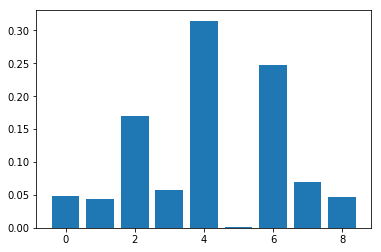

In [189]:
clf.fit(X_train, Y_train)

# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [190]:
X_train = X_train.drop([5], axis=1)
X_test = X_test.drop([5], axis=1)

In [191]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, base_estimator=DecisionTreeClassifier(max_depth = depth, min_samples_split = min_samples), learning_rate=0.5, random_state=0)

score = np.mean(cross_val_score(clf, X_train, Y_train, scoring = "f1"))
score

0.9258321053000707

Feature: 0, Score: 0.10530
Feature: 1, Score: 0.07234
Feature: 2, Score: 0.07070
Feature: 3, Score: 0.05804
Feature: 4, Score: 0.44865
Feature: 5, Score: 0.16127
Feature: 6, Score: 0.02781
Feature: 7, Score: 0.05589


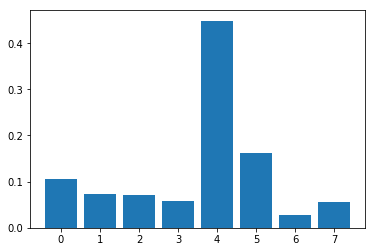

In [192]:
clf.fit(X_train, Y_train)

# get importance
importance = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [193]:
clf.fit(X_train, Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=17,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=9,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=100, random_state=0)

In [194]:
Y_pred = clf.predict(X_test)
Y_pred_df = pd.DataFrame(data=Y_pred)
test_data["class"] = Y_pred_df[0]

In [195]:
result = test_data[["ID","class"]]
result.to_csv("resultDT.csv", index=False)
result.head()

,ID,class
0,oRB8lJynqBA,True
1,of-UPoEnw_w,False
2,d28cz00HHto,False
3,Tftg_LnwTW0,False
4,qR0mkm65Whk,False


In [196]:
result.describe()

,ID,class
count,646,646
unique,646,2
top,xw6gwfMmS0E,False
freq,1,325
